In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
full_data_clean_enc = pd.read_csv('full_data_clean_enc.csv')

In [3]:
full_data_clean_enc.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,2,2,6,2,1,1,1,0,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,1,1,10,1,1,1,2,0,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,1,1,17,4,4,1,3,1,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,0,1,2,5,1,1,4,1,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,2,1,10,1,3,1,5,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [4]:
full_data_clean_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null int64
BusinessTravel             4410 non-null int64
Department                 4410 non-null int64
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null int64
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null int64
JobLevel                   4410 non-null int64
JobRole                    4410 non-null int64
MaritalStatus              4410 non-null int64
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4410 non-null float64
Over18                     4410 non-null int64
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-null int6

Eliminate unnecessary column/feature before feature selection

In [5]:
full_data_clean_enc_drop = full_data_clean_enc.drop(columns = ['EmployeeCount','EmployeeID','StandardHours','Over18',])

In [6]:
full_data_clean_enc_drop.info() # Check if such drop columns has been done correctly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 25 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null int64
BusinessTravel             4410 non-null int64
Department                 4410 non-null int64
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null int64
Gender                     4410 non-null int64
JobLevel                   4410 non-null int64
JobRole                    4410 non-null int64
MaritalStatus              4410 non-null int64
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4410 non-null float64
PercentSalaryHike          4410 non-null int64
StockOptionLevel           4410 non-null int64
TotalWorkingYears          4410 non-null float64
TrainingTimesLastYear      4410 non-null int64
YearsAtCompany             4410 non-null int64
YearsSinceLastPromotion    4410 non-null in

In [7]:
full_data_clean_enc_drop.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')

Set independent variable (target) and dependent variable(features)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
x1 = full_data_clean_enc_drop.drop(columns = 'Attrition')
y1 = full_data_clean_enc_drop['Attrition']

## Splitting data Train/Test 80/20
### Note: Random state is given to ensure consistency result

In [37]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size = 0.2,random_state = 42)

[[741   0]
 [141   0]]


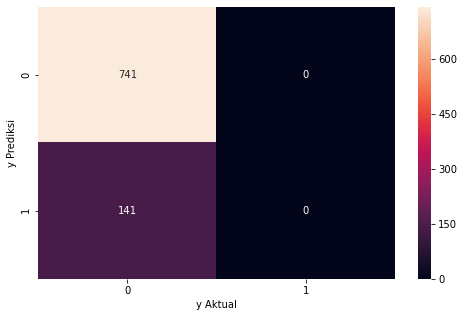

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       741
           1       0.00      0.00      0.00       141

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.71      0.84      0.77       882

Train score: 83.84%
Test score: 84.01%



C:\Users\Azizur Rachman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
model1 = LogisticRegression(solver='lbfgs',penalty='l2', max_iter=100, random_state=1)
model1.fit(x1_train, y1_train)
# print(model1.coef_)
# print(model1.intercept_)

# m = model1.coef_[0][0]
# c = model1.intercept_[0]
# prediksi
y1_pred = model1.predict(x1_test)

print(confusion_matrix(y1_test, y1_pred))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.show()

print(classification_report(y1_test, y1_pred))
print(f'Train score: {round(model1.score(x1_train, y1_train)*100, 2)}%')
print(f'Test score: {round(model1.score(x1_test, y1_test)*100, 2)}%\n')